## **Импорт библиотек**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import warnings

warnings.filterwarnings('ignore')

## **Загрузка данных**

In [3]:
data = pd.read_excel('data.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## **Исследовательский анализ данных (EDA)**

**Нормализация для анализа**

In [8]:
from sklearn.preprocessing import LabelEncoder

data_copy = data.copy()
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    data_copy[category] = le.fit_transform(data_copy[category].astype(str))

wrong_data = data_copy[data_copy['Quantity']<0].index
data_copy.drop(index=wrong_data,axis=0,inplace=True)
data_copy.reset_index(drop=True,inplace=True)

scaler = MinMaxScaler(feature_range=(1,5))
normalized_array = scaler.fit_transform(data_copy)
normalized_df = pd.DataFrame(normalized_array,columns=data_copy.columns)
normalized_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1.000000,4.476038,4.712864,1.000247,1.0,2.798876,4.703568,4.891892
1,1.000000,3.746621,4.720445,1.000247,1.0,2.799012,4.703568,4.891892
2,1.000000,3.992381,1.865198,1.000346,1.0,2.798908,4.703568,4.891892
3,1.000000,3.934382,2.809998,1.000247,1.0,2.799012,4.703568,4.891892
4,1.000000,3.933399,3.758588,1.000247,1.0,2.799012,4.703568,4.891892
...,...,...,...,...,...,...,...,...
531280,4.999456,2.501106,3.254442,1.000543,5.0,2.798599,1.251601,2.405405
531281,4.999456,2.772426,1.704099,1.000247,5.0,2.798803,1.251601,2.405405
531282,4.999456,3.108626,1.709784,1.000148,5.0,2.799136,1.251601,2.405405
531283,4.999456,3.109609,1.708837,1.000148,5.0,2.799136,1.251601,2.405405


**Гистограммы всех признаков**

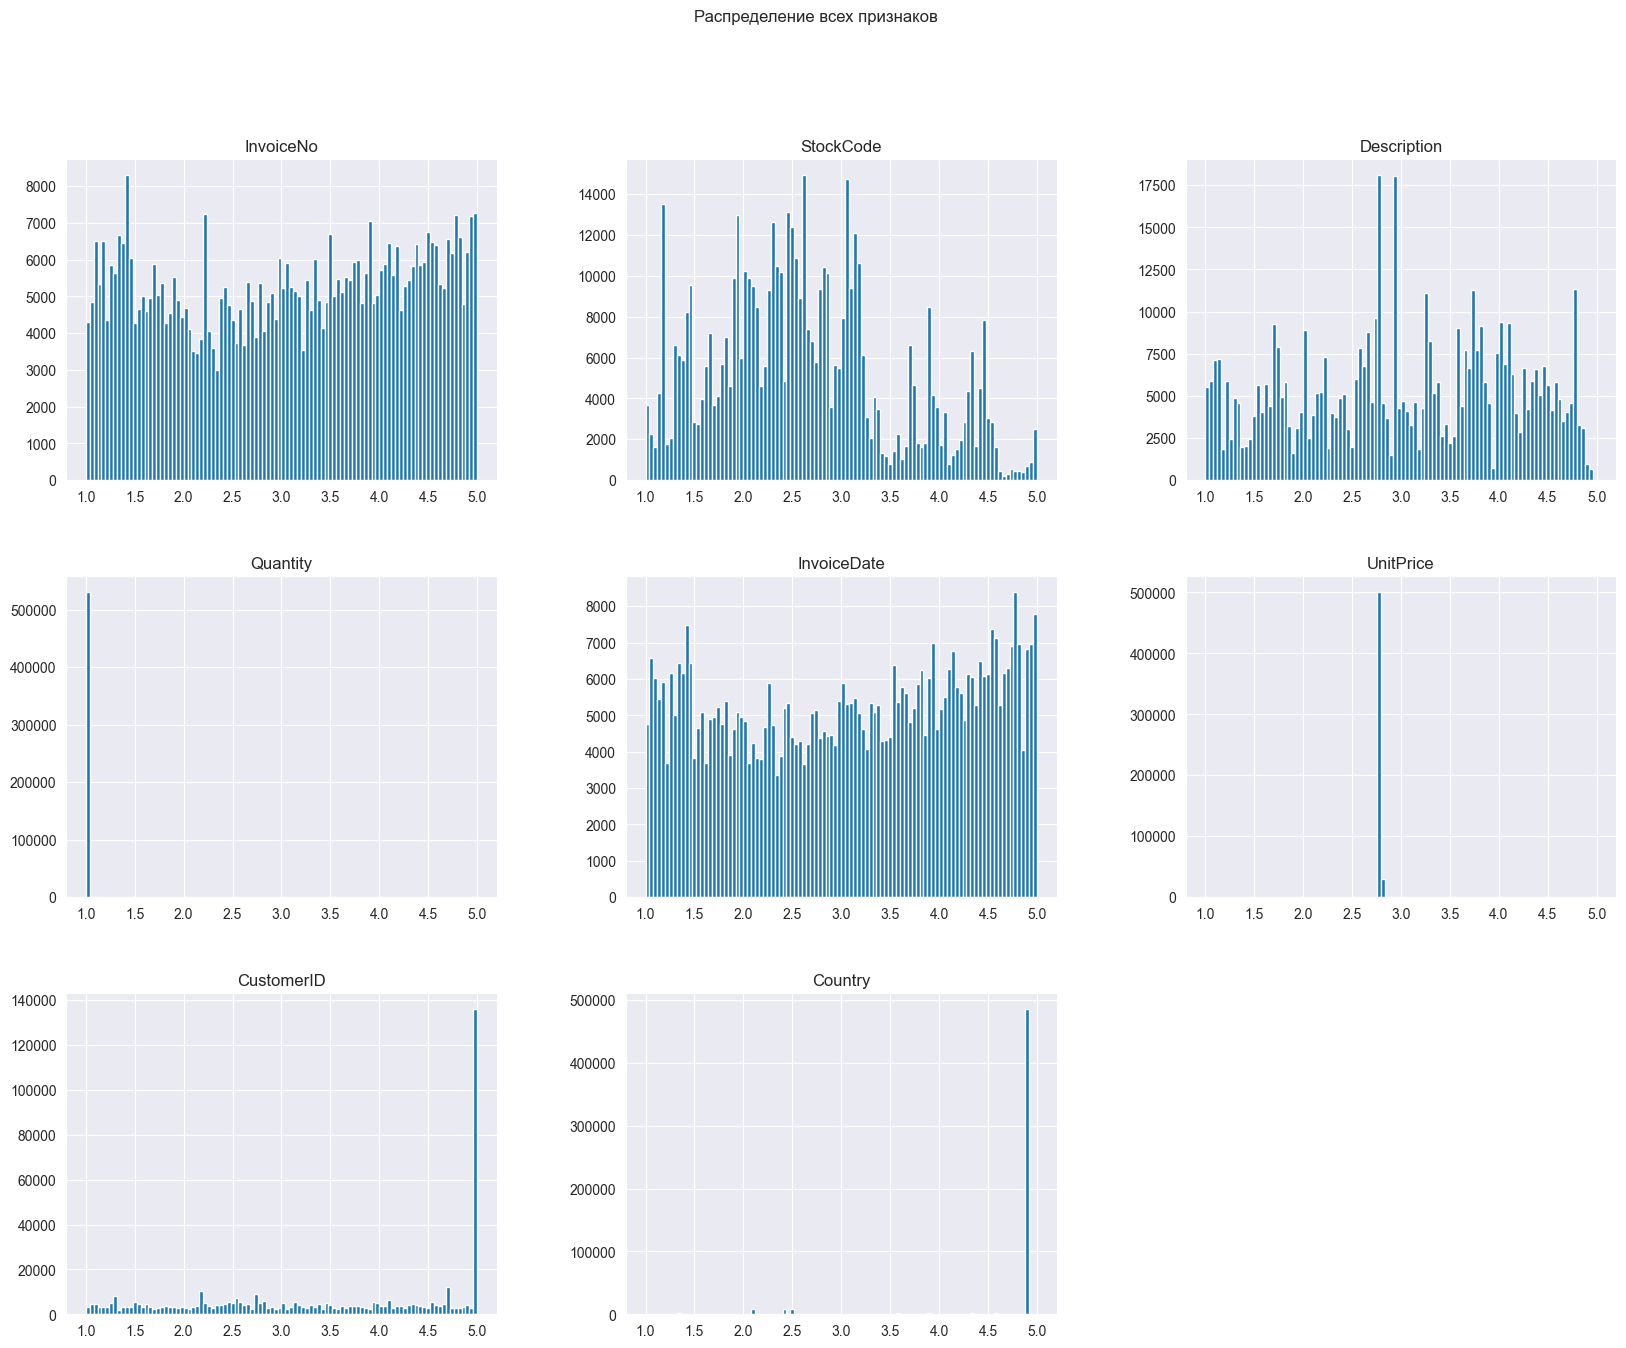

In [10]:
normalized_df.hist(bins=100,figsize=(20,15))
plt.suptitle('Распределение всех признаков')
plt.show()

**Парный график выборки данных**

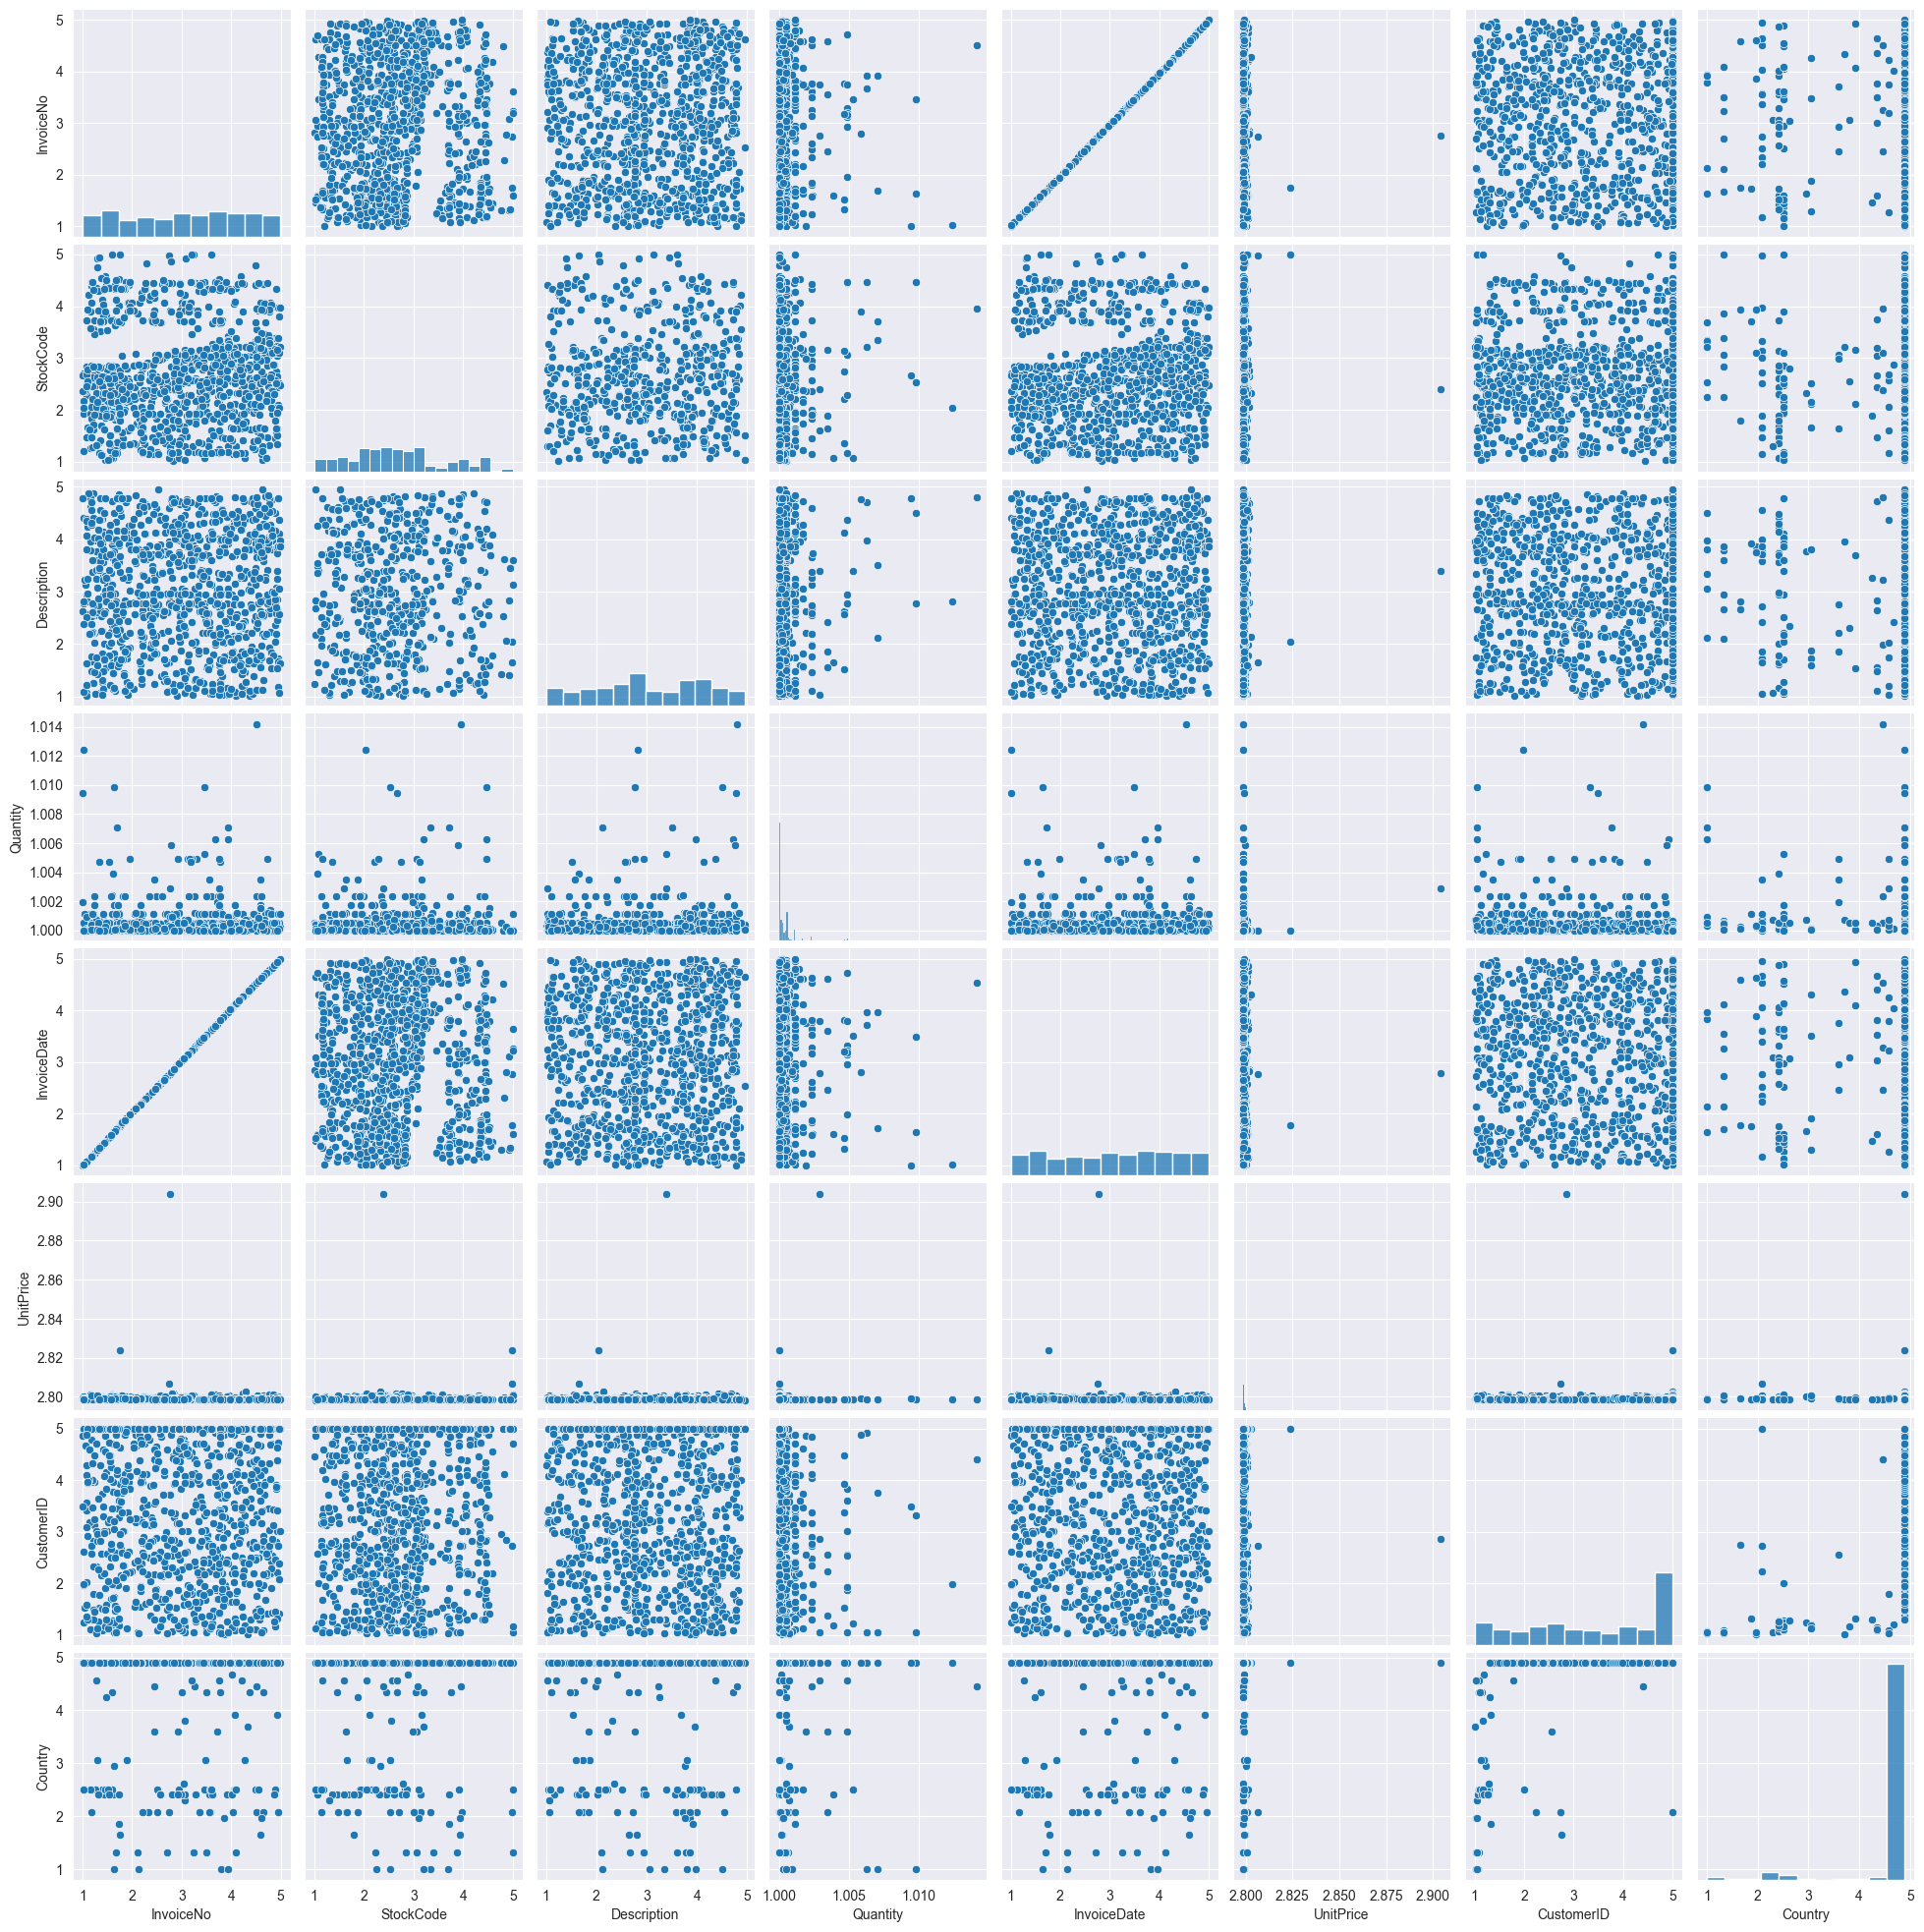

In [12]:
sns.pairplot(normalized_df.sample(1000))
plt.show()

**Тепловая карта корреляции**

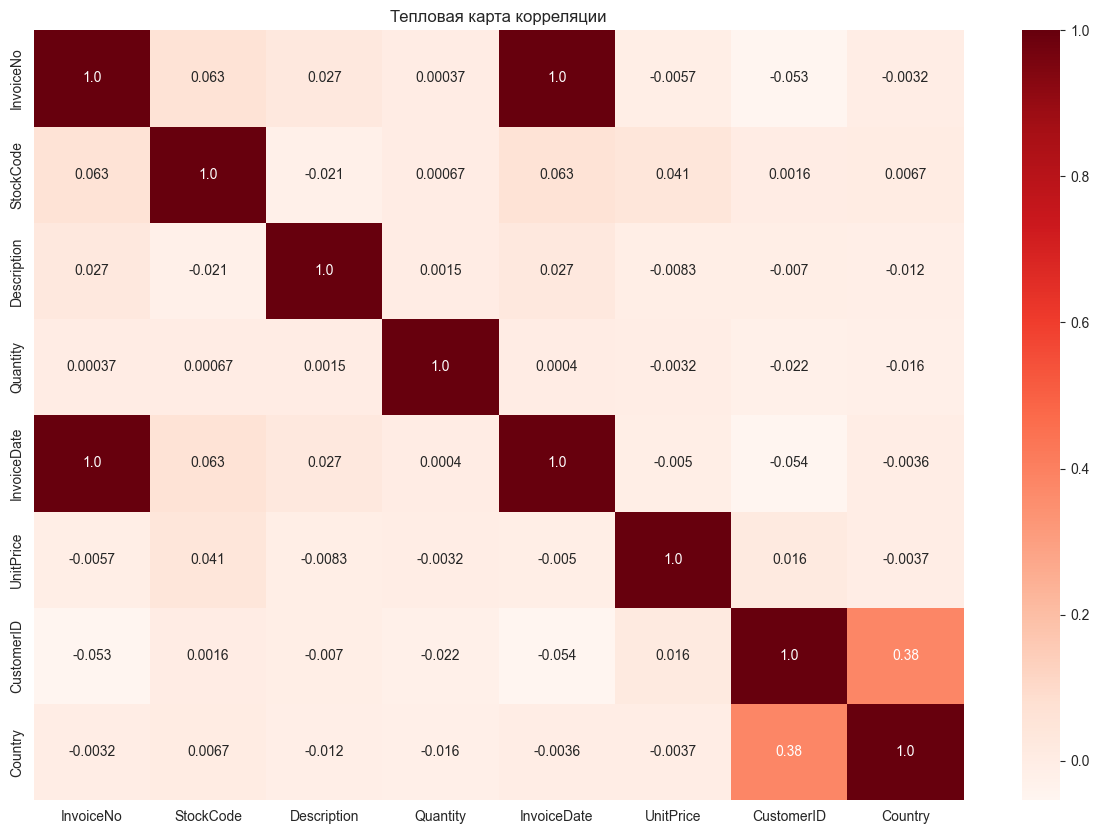

In [13]:
corr = normalized_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True,cmap = "Reds", fmt = '0.2')
plt.title('Тепловая карта корреляции')
plt.show()

**Анализ главных компонент (PCA)**

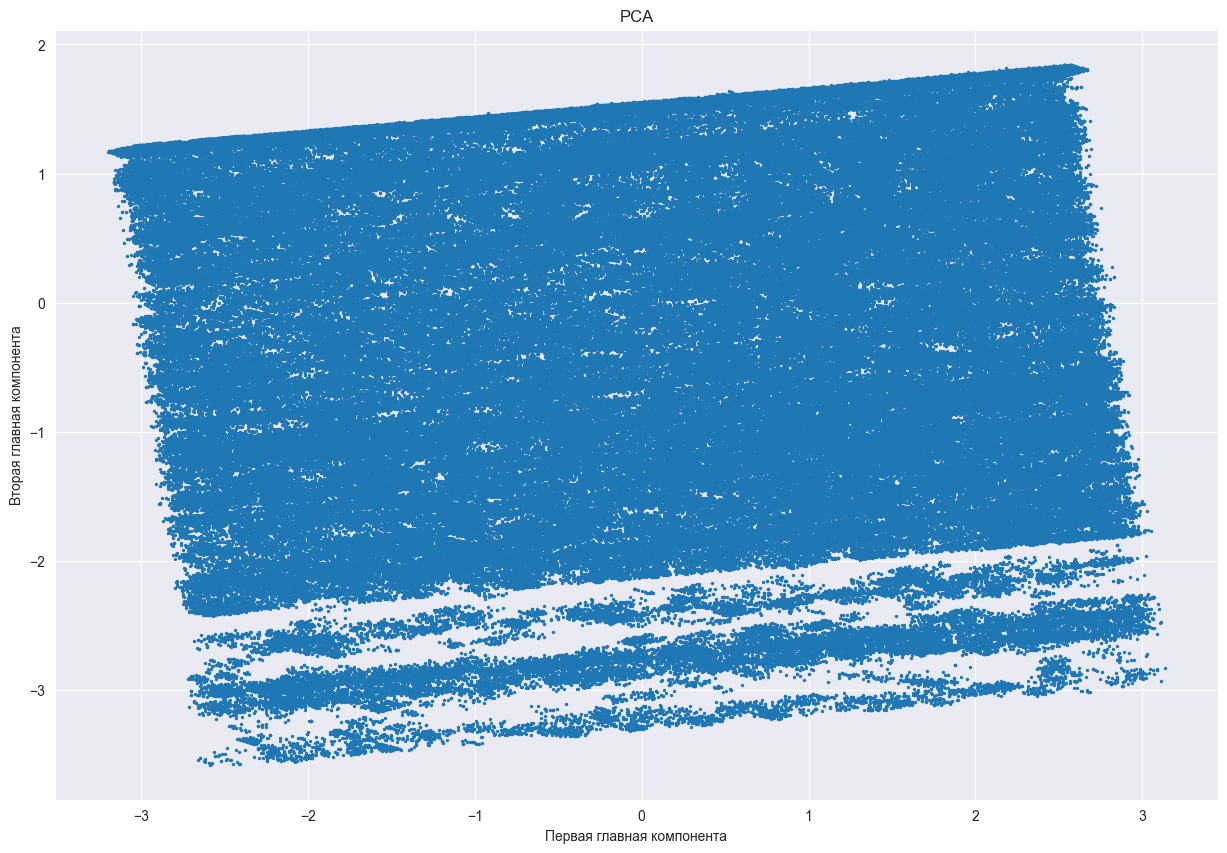

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

## **Предаврительная обработка данных**

### **Новизна, частота, затраты**

**Вычислим следующие метрики для каждого клиента**
  - **Новизна (Recency)**: как давно клиент совершил покупку
  - **Частота (Frequency)**: как часто клиент совершает покупки
  - **Затраты (Monetary)**: сколько тратит клиент

In [19]:
data['Total_Price'] = data['Quantity'] * data['UnitPrice']

reference_date = data['InvoiceDate'].max()

data_rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Price': 'sum'
})

data_rfm = data_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Price': 'Monetary'
}).reset_index()

data_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


### **Нормализация данных**

**Чтобы гарантировать, что алгоритм кластеризации не будет смещен из-за различных масштабов данных, мы нормализуем признаки RFM**

In [23]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_rfm[['Recency', 'Frequency', 'Monetary']])

data_normalized = pd.DataFrame(data_scaled, columns= ['Recency','Frequency','Monetary'])

data_normalized = pd.concat([data_rfm[['CustomerID']].reset_index(drop=True), data_normalized], axis=1)

print("RFM датафрейм до масштабирования:")
print(data_rfm.head())

print("\nНормазилованный RFM датафрейм после масштабирования:")
print(data_normalized.head())

RFM датафрейм до масштабирования:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1        182   4310.00
2     12348.0       74         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      309         17    334.40

Нормазилованный RFM датафрейм после масштабирования:
   CustomerID   Recency  Frequency  Monetary
0     12346.0  0.871314   0.000125  0.015109
1     12347.0  0.002681   0.022676  0.030297
2     12348.0  0.198391   0.003758  0.021442
3     12349.0  0.048257   0.009020  0.021303
4     12350.0  0.828418   0.002005  0.016288


## **Настройка и запуск DBSCAN**

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_rfm['DB_Cluster'] = dbscan.fit_predict(data_scaled)

print(data_rfm.groupby('DB_Cluster').mean())

              CustomerID    Recency  Frequency     Monetary
DB_Cluster                                                 
0           15299.677722  91.047118  93.053294  1898.459701


In [26]:
print("Вывод кластера:")
print(data_rfm.head())

Вывод кластера:
   CustomerID  Recency  Frequency  Monetary  DB_Cluster
0     12346.0      325          2      0.00           0
1     12347.0        1        182   4310.00           0
2     12348.0       74         31   1797.24           0
3     12349.0       18         73   1757.55           0
4     12350.0      309         17    334.40           0


## **Визуализация кластеров**

**Визуализация PCA**

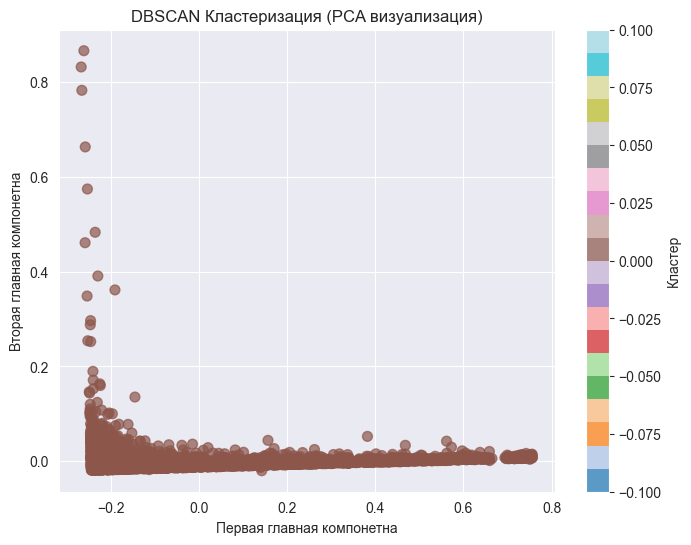

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
map = "tab20"

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_rfm['DB_Cluster'], cmap = map, s=50, alpha=0.7)
plt.title('DBSCAN Кластеризация (PCA визуализация)')
plt.xlabel('Первая главная компонетна')
plt.ylabel('Вторая главная компонетна')
plt.colorbar(label='Кластер')
plt.show()

**t-SNE для визуализации**

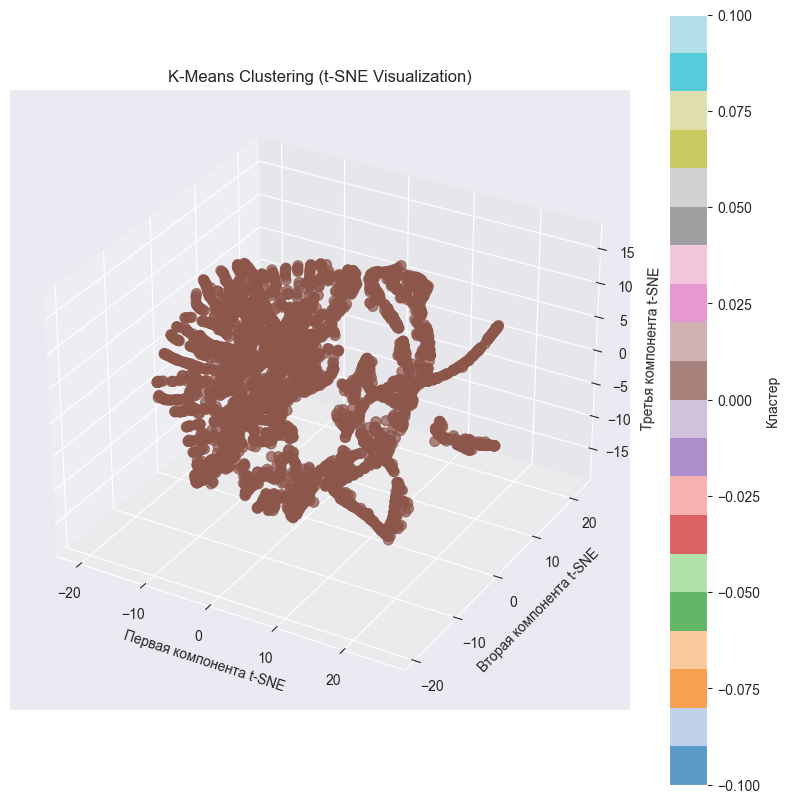

In [28]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(data_scaled)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=data_rfm['DB_Cluster'], cmap = map, s=50, alpha=0.7)

ax.set_title('K-Means Clustering (t-SNE Visualization)')
ax.set_xlabel('Первая компонента t-SNE')
ax.set_ylabel('Вторая компонента t-SNE')
ax.set_zlabel('Третья компонента t-SNE')
plt.colorbar(scatter, label='Кластер')
plt.show()

**DBSCAN Кластеризация с различными значениями eps**

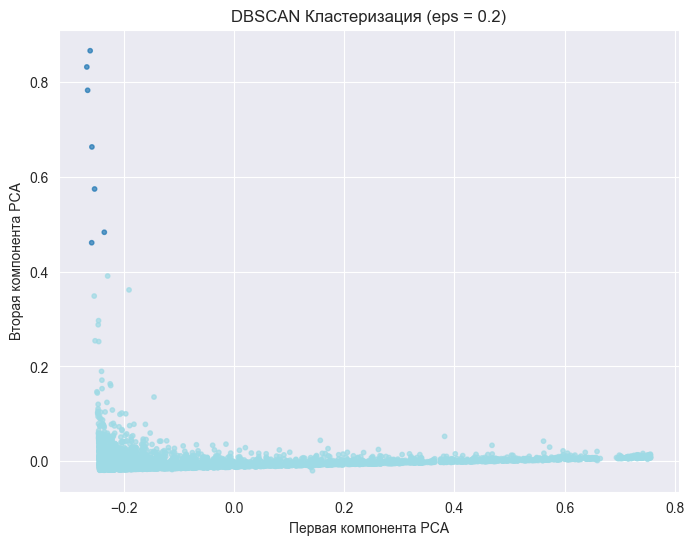

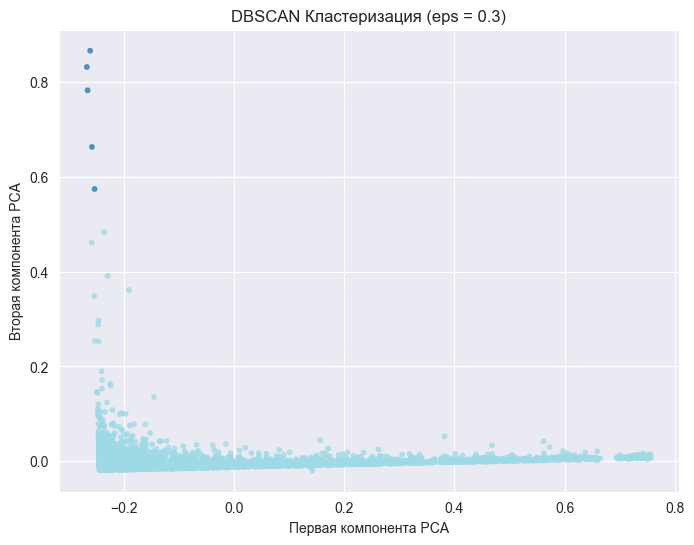

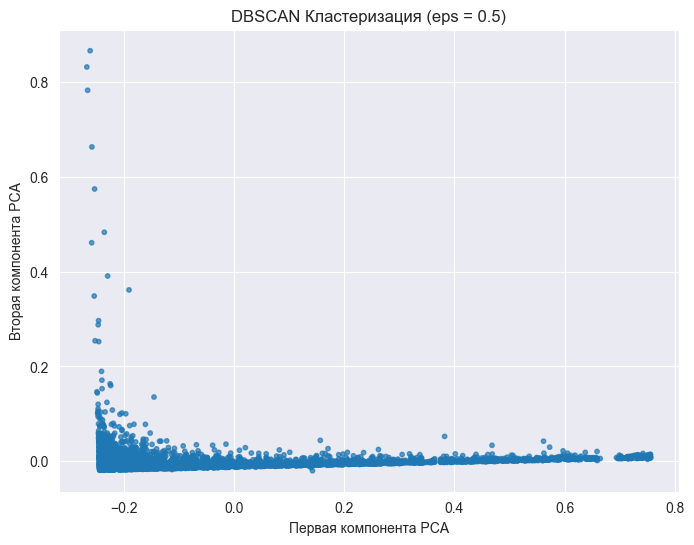

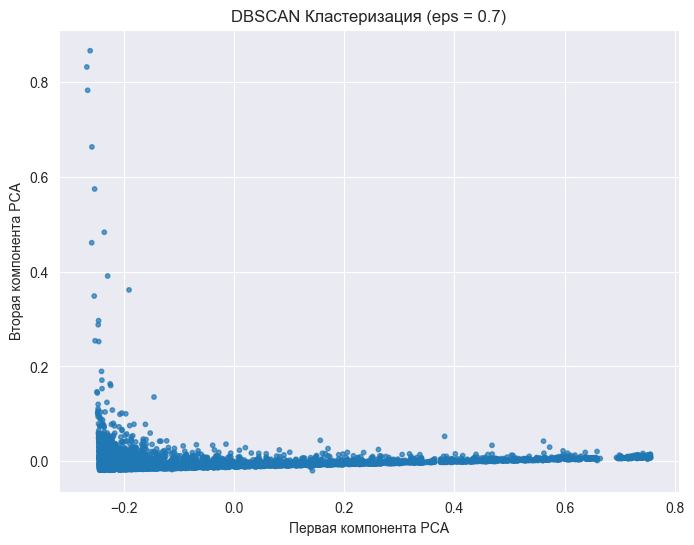

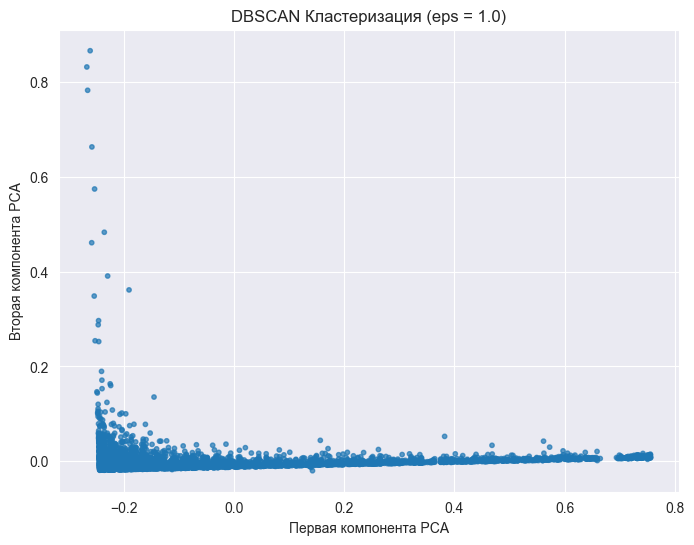

In [32]:
def visualize_dbscan_with_different_eps(data, eps_values, min_samples=5):
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data)

        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(data)

        plt.figure(figsize=(8, 6))
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="tab20", s=10, alpha=0.7)
        plt.title(f"DBSCAN Кластеризация (eps = {eps})")
        plt.xlabel("Первая компонента PCA")
        plt.ylabel("Вторая компонента PCA")

        plt.show()

eps_values = [0.2, 0.3, 0.5, 0.7, 1.0]
visualize_dbscan_with_different_eps(data_scaled, eps_values)